# SPAM CLASSIFICATION

---

#### Import the dataset

In [4]:
import pandas as pd
messages = pd.read_csv('./data/smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.shape

(5572, 2)

In [9]:
type(messages['label'])

pandas.core.series.Series

In [10]:
messages['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [13]:
messages.iloc[0]

label                                                    ham
message    Go until jurong point, crazy.. Available only ...
Name: 0, dtype: object

In [15]:
messages.iloc[0].message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### Data cleaning and preprocessing

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
lemm = WordNetLemmatizer()

In [17]:
corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [18]:
word_tokens = []
for sentence in corpus:
    for word in nltk.word_tokenize(sentence):
        word_tokens.append(word)

In [20]:
len(word_tokens)

50445

In [21]:
word_tokens

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',

In [23]:
from nltk.probability import FreqDist
fd = FreqDist(word_tokens)
fd

FreqDist({'u': 1295, 'call': 641, 'get': 408, 'ur': 391, 'gt': 318, 'go': 316, 'lt': 316, 'ok': 293, 'day': 293, 'free': 288, ...})

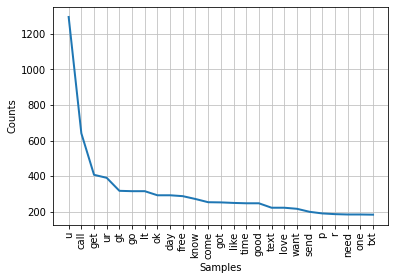

In [26]:
from matplotlib import pyplot as plt
fd.plot(25)
plt.show()

#### Creating the Bag of Words model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
def countNonZeros(X, idx):
    count = 0
    for ele in X[idx]:
        if (ele != 0):
            count += 1
    return count

In [39]:
print(countNonZeros(X, 0))
print(countNonZeros(X, 1))
print(countNonZeros(X, 2))

11
5
18


In [43]:
y = pd.get_dummies(messages['label'])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [44]:
y = y.iloc[:, 1].values

In [46]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

#### Train-Test split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [48]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=uint8))

In [49]:
X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([0, 1, 0, ..., 0, 1, 0], dtype=uint8))

In [50]:
print(X_train.shape, y_train.shape)

(4457, 2500) (4457,)


In [51]:
print(X_test.shape, y_test.shape)

(1115, 2500) (1115,)


In [53]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [54]:
print(type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### Training model using Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train, y_train)

In [55]:
y_pred = spam_detection_model.predict(X_test)

In [56]:
y_pred.shape

(1115,)

In [57]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [59]:
confusion_mat

array([[946,   9],
       [ 10, 150]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [61]:
score

0.9829596412556054

#### Example

In [79]:
sms_text1 = 'Congratulations you have won Rs. 1, Click this link to claim your amount'

In [80]:
sms_text2 = 'I am coming back home in 2 hours'

In [81]:
import numpy as np

In [86]:
def predict_spam_ham(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [lemm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    review = [review]
    review = np.array(review)
    
    X = cv.transform(review).toarray()
    prediction = spam_detection_model.predict(X)
    if (prediction == 0):
        return 'ham' 
    else:
        return 'spam'

In [87]:
predict_spam_ham(sms_text1)

'spam'

In [88]:
predict_spam_ham(sms_text2)

'ham'